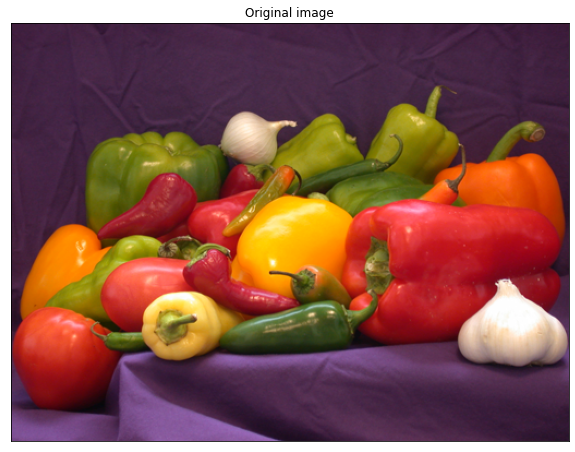

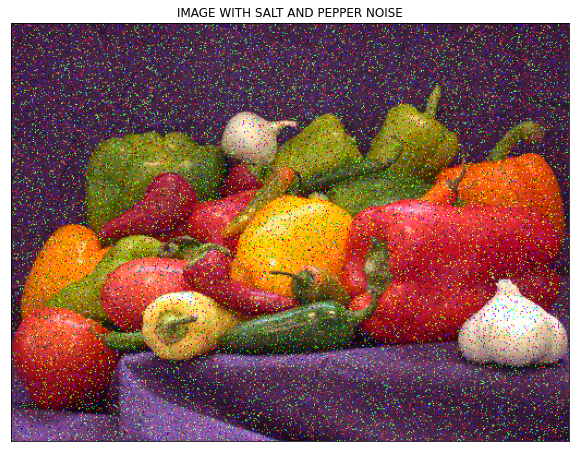

In [1]:
import cv2
import numpy as np
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


figsize = (10, 10)
def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

#READ THE RGB IMAGE
I = cv2.imread("peppers.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plot_im(I, "Original image")
# Add salt-and-pepper noise to the image.
A = random_noise(I, mode='s&p',seed=None, clip=True,amount=0.1)

plot_im(A,"IMAGE WITH SALT AND PEPPER NOISE")







In [2]:
import math
#DEFINE THE WINDOW SIZE MXN
M=3
N=3
#PAD THE MATRIX WITH ZEROS ON ALL SIDES
modifyA=np.pad(A,[math.floor(M/2)-1,math.floor(N/2)-1]);

B = np.zeros([(A.shape[0]),(A.shape[1]),3])
med_indx = round((M*N)/2); #MEDIAN INDEX

In [3]:
for i in range (modifyA.shape[0]-(M)):
  for j in range (modifyA.shape[1]-(N)):
     temp = modifyA[i:i+(M), j:j+(N),:];
     #RED,GREEN AND BLUE CHANNELS ARE TRAVERSED SEPARATELY
     for k in range (0,3):
       tmp = temp[:,:,k]
       tmp = np.sort(tmp)
       B[i,j,k] = np.median(tmp[:]);


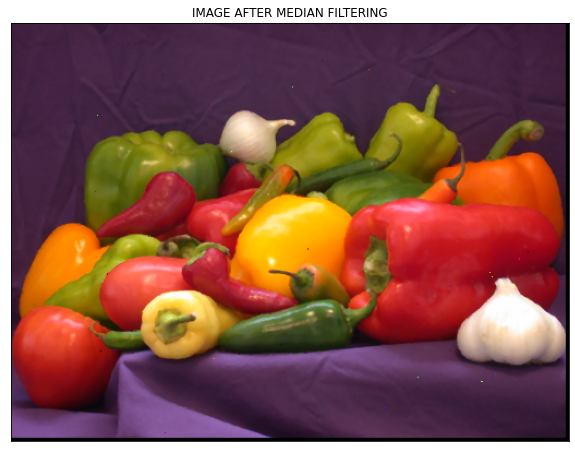

In [4]:
#CONVERT THE IMAGE TO UINT8 FORMAT.
B= np.array(255*B, dtype = 'uint8')
plot_im(B, "IMAGE AFTER MEDIAN FILTERING")
